In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import dataset

geo = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/capstone_banking/Geo_scores.csv')
instances = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/capstone_banking/instance_scores.csv')
lambdawts = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/capstone_banking/Lambda_wts.csv')
qset = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/capstone_banking/Qset_tats.csv')
train = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/capstone_banking/train.csv')
test = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/capstone_banking/test_share.csv')

In [3]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [4]:
#Basic information

print(geo.info())
print('*******'*5)

print(instances.info())
print('*******'*5)

print(lambdawts.info())
print('*******'*5)

print(qset.info())
print('*******'*5)

print(train.info())
print('*******'*5)

print(test.info())
print('*******'*5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   l

### Checking missing data

In [5]:
print(geo.isnull().sum())
print('*******'*5)

print(instances.isnull().sum())
print('*******'*5)

print(lambdawts.isnull().sum())
print('*******'*5)

print(qset.isnull().sum())
print('*******'*5)

print(train.isnull().sum())
print('*******'*5)

print(test.isnull().sum())
print('*******'*5)

id               0
geo_score    71543
dtype: int64
***********************************
id                 0
instance_scores    0
dtype: int64
***********************************
Group        0
lambda_wt    0
dtype: int64
***********************************
id                           0
qsets_normalized_tat    103201
dtype: int64
***********************************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64
***********************************
id                0
Gro

In [6]:
#Checking the percentage of missing data

print(geo.isnull().sum()/len(geo)*100)

print()

print(qset.isnull().sum()/len(qset)*100)


id           0.000000
geo_score    5.023964
dtype: float64

id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


In [7]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.352492e+06
mean,1.424030e+05,-9.279168e-06
std,8.221673e+04,7.827199e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,4.581000e+01


<Axes: ylabel='geo_score'>

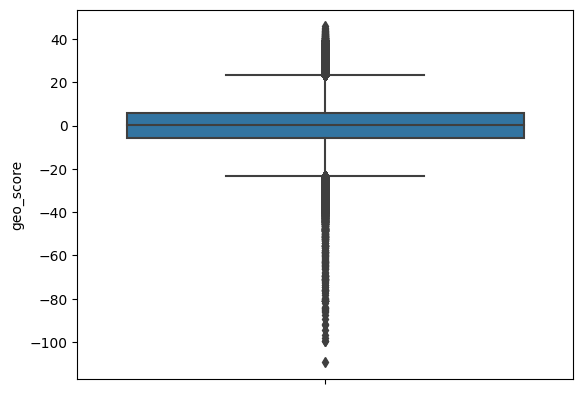

In [8]:
sns.boxplot(y='geo_score', data=geo)

In [9]:
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())

geo['geo_score'].isnull().sum()

0

In [10]:
qset.describe()

,id,qsets_normalized_tat
count,1.424035e+06,1.320834e+06
mean,1.424030e+05,1.094006e-05
std,8.221673e+04,7.731794e+00
min,0.000000e+00,-1.404400e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,2.000000e-02
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,6.110000e+01


<Axes: ylabel='qsets_normalized_tat'>

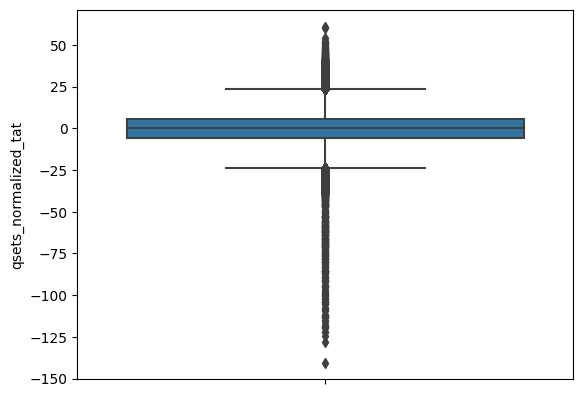

In [11]:
sns.boxplot(y='qsets_normalized_tat', data=qset)

In [12]:
qset['qsets_normalized_tat'] = qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

qset['qsets_normalized_tat'].isnull().sum()

0

In [13]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


### Checking duplicate records

In [14]:
print(geo.duplicated().sum())
print('*******'*5)
print()

print(instances.duplicated().sum())
print('*******'*5)
print()

print(lambdawts.duplicated().sum())
print('*******'*5)
print()

print(qset.duplicated().sum())
print('*******'*5)
print()

print(train.duplicated().sum())
print('*******'*5)
print()

print(test.duplicated().sum())
print('*******'*5)

55349
***********************************

33600
***********************************

0
***********************************

59314
***********************************

0
***********************************

0
***********************************


We will not drop duplicated records as they are unique transactios

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              227845 non-null  int64  
 1   Group           227845 non-null  object 
 2   Per1            227845 non-null  float64
 3   Per2            227845 non-null  float64
 4   Per3            227845 non-null  float64
 5   Per4            227845 non-null  float64
 6   Per5            227845 non-null  float64
 7   Per6            227845 non-null  float64
 8   Per7            227845 non-null  float64
 9   Per8            227845 non-null  float64
 10  Per9            227845 non-null  float64
 11  Dem1            227845 non-null  float64
 12  Dem2            227845 non-null  float64
 13  Dem3            227845 non-null  float64
 14  Dem4            227845 non-null  float64
 15  Dem5            227845 non-null  float64
 16  Dem6            227845 non-null  float64
 17  Dem7      

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              56962 non-null  int64  
 1   Group           56962 non-null  object 
 2   Per1            56962 non-null  float64
 3   Per2            56962 non-null  float64
 4   Per3            56962 non-null  float64
 5   Per4            56962 non-null  float64
 6   Per5            56962 non-null  float64
 7   Per6            56962 non-null  float64
 8   Per7            56962 non-null  float64
 9   Per8            56962 non-null  float64
 10  Per9            56962 non-null  float64
 11  Dem1            56962 non-null  float64
 12  Dem2            56962 non-null  float64
 13  Dem3            56962 non-null  float64
 14  Dem4            56962 non-null  float64
 15  Dem5            56962 non-null  float64
 16  Dem6            56962 non-null  float64
 17  Dem7            56962 non-null 

Encoding is not required as all the columns are in float/int

### Merging multiple csv to single dataframe

In [17]:
print('Geo :', geo['id'].nunique())
print('*******'*5)
print()

print("Instances: ",instances['id'].nunique())
print('*******'*5)
print()

print('lambdawts: ',lambdawts['Group'].nunique())
print('*******'*5)
print()

print('qset: ',qset['id'].nunique())
print('*******'*5)
print()

print('Test: ',test['Group'].nunique())
print('*******'*5)

print('Test id: ',test['id'].nunique())
print('*******'*5)

print('Train :',train['Group'].nunique())
print('*******'*5)
print()

print('Train id :',train['id'].nunique())
print('*******'*5)
print()

Geo : 284807
***********************************

Instances:  284807
***********************************

lambdawts:  1400
***********************************

qset:  284807
***********************************

Test:  915
***********************************
Test id:  56962
***********************************
Train : 1301
***********************************

Train id : 227845
***********************************



In [18]:
train['data'] = 'train'
test['data'] = 'test'

In [19]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train


In [20]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test


In [21]:
print(train.shape)

print(test.shape)


(227845, 29)
(56962, 28)


In [22]:
#Merging both train and test 
all_data = pd.concat([train, test], axis=0)

In [23]:
all_data.isnull().sum()

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64

In [24]:
print('Geo :', geo['id'].nunique())
print('*******'*5)
print()

print("Instances: ",instances['id'].nunique())
print('*******'*5)
print()

print('lambdawts: ',lambdawts['Group'].nunique())
print('*******'*5)
print()

print('qset: ',qset['id'].nunique())
print('*******'*5)
print()

print('All data :',all_data['id'].nunique())
print('*******'*5)
print()

print('All data: ',all_data['Group'].nunique())
print('*******'*5)

Geo : 284807
***********************************

Instances:  284807
***********************************

lambdawts:  1400
***********************************

qset:  284807
***********************************

All data : 284807
***********************************

All data:  1400
***********************************


In [25]:
all_data.shape

(284807, 29)

In [26]:
geo.shape

(1424035, 2)

In [27]:
geo = geo.groupby('id').mean()

In [28]:
all_data = pd.merge(all_data, geo, on='id', how='left')
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850


In [29]:
all_data.shape

(284807, 30)

In [30]:
# Working on instances dataset
instances['id'].nunique()

284807

In [31]:
instances.shape

# There are 1424035 records in instances dataset, of which only 284807 are unique. 
# We will group by id column to get uniqur records which matches all_data dataframe and then merge with all_data df

(1424035, 2)

In [32]:
instances = instances.groupby('id').mean()

In [33]:
all_data = pd.merge(all_data, instances, on='id', how='left')

In [34]:
all_data.shape

(284807, 31)

In [35]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47


In [36]:
# Working on lambda csv

lambdawts.columns

Index(['Group', 'lambda_wt'], dtype='object')

In [37]:
lambdawts.shape

(1400, 2)

In [38]:
lambdawts['Group'].nunique()

1400

In [39]:
all_data.shape

(284807, 31)

In [40]:
all_data['Group'].nunique()

1400

In [41]:
# lambdawts.groupby('lambda_wt').mean()
all_data = pd.merge(all_data, lambdawts, on='Group', how='left')

In [42]:
print(all_data.shape)

(284807, 32)


In [43]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,0.60


In [44]:
# working with qset

print(qset.shape)

(1424035, 2)


In [45]:
qset.dtypes

id                        int64
qsets_normalized_tat    float64
dtype: object

In [46]:
qset['qsets_normalized_tat'] =  qset['qsets_normalized_tat'].astype(float)

In [47]:
qset.shape

(1424035, 2)

In [48]:
qset.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [49]:
qset = qset.groupby('id').mean()

In [50]:
all_data = pd.merge(all_data, qset, on='id', how='left')
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.13,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.66,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.51,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,0.72,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,0.60,-0.630


In [51]:
all_data.shape

(284807, 33)

### Split the train and test data seperately

In [52]:
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

print(train.shape)
print(test.shape)


(227845, 33)
(56962, 33)


In [53]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'lambda_wt', 'qsets_normalized_tat'],
      dtype='object')

In [54]:
#Target - train dataset 
#Splitting the data into dep and ind variable

x = train.drop(['id','Group','Target','data'], axis=1)
y = train[['Target']]

In [55]:
x.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.13,-0.700
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.66,0.140
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.51,-0.430
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,0.72,-0.302
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,0.60,-0.630


In [56]:
y.head()

,Target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [57]:
#Targetting test dataset
test = test.drop(['id','Group','Target','data'], axis=1)
test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,0.76,-0.426
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,0.18,-0.620
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,0.39,-0.406
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,1.80,0.374
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,1.89,-0.130


### Data preprocessing

1. Missing value imputation - Completed
2. Encoding - Not req. as there are no char variable
3. Outlier treatment
4. Feature Scaling - Done
5. Imbalance dataset check 

In [58]:
x.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.008908,-0.000123,0.000350,0.001346
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997629,1.091488,0.957957,0.850169
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-19.210000,-25.156000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.400000,-0.540000,-0.430000,-0.480000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.150000,-0.090000,0.050000,-0.066000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.630000,0.450000,0.490000,0.400000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,10.530000,8.540000


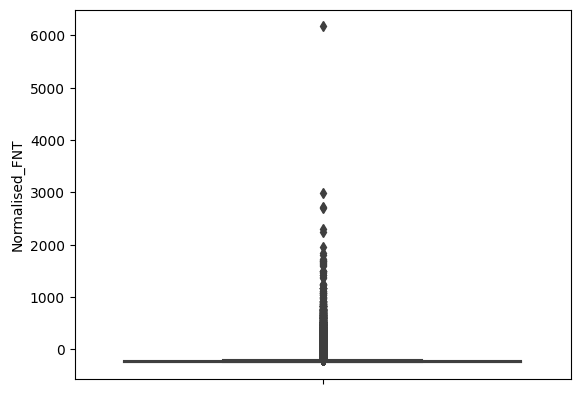

In [59]:
sns.boxplot(y='Normalised_FNT', data=x)
plt.show()

In [60]:
# Holding capping method as of now as positive outlier range is -203.94 and only few data are above this range

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)

In [62]:
pd.DataFrame(sc_x).describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,...,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05
mean,2.469880e-16,-1.035354e-16,2.169253e-16,3.414173e-16,-1.947214e-16,-2.275907e-16,7.035416e-17,2.681083e-16,-1.645339e-16,1.437177e-16,...,5.771474e-16,-3.144731e-16,-2.627054e-16,-1.728916e-16,1.465774e-15,-4.682325e-16,1.871121e-19,4.443913e-18,-9.854572e-18,7.983451e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.874447e+01,-4.421098e+01,-3.181486e+01,-4.011726e+00,-8.217170e+01,-1.961595e+01,-3.493340e+01,-6.078089e+01,-1.221350e+01,-4.582104e+00,...,-4.679759e+00,-1.970929e+01,-4.644689e+00,-5.541489e+01,-4.608324e+01,-3.558561e-01,-1.873336e+01,-2.252882e+01,-2.005350e+01,-2.959106e+01
25%,-4.678047e-01,-3.605683e-01,-5.851915e-01,-6.003821e-01,-4.986139e-01,-5.789326e-01,-4.417124e-01,-1.733613e-01,-5.820826e-01,-7.438795e-01,...,-5.914703e-01,-6.128164e-01,-6.853842e-01,-1.711252e-01,-1.503079e-01,-3.335403e-01,-4.098801e-01,-4.946259e-01,-4.492380e-01,-5.661782e-01
50%,6.105872e-03,4.066939e-02,1.191877e-01,-1.416771e-02,-3.624526e-02,-2.040406e-01,3.143566e-02,1.756780e-02,-4.552782e-02,-2.910820e-02,...,6.793120e-02,3.776502e-02,-1.049626e-01,7.443046e-04,2.888425e-02,-2.672385e-01,1.414280e-01,-8.234372e-02,5.182947e-02,-7.921500e-02
75%,6.685615e-01,4.844626e-01,6.787413e-01,5.226069e-01,4.405724e-01,2.983147e-01,4.564670e-01,2.749070e-01,5.455918e-01,7.248287e-01,...,7.273327e-01,6.692117e-01,4.961884e-01,2.217194e-01,2.379418e-01,-4.512932e-02,6.225696e-01,4.123949e-01,5.111413e-01,4.689126e-01
max,1.249484e+00,1.340918e+01,6.175532e+00,1.164655e+01,2.514117e+01,5.495757e+01,9.670601e+01,1.661179e+01,1.417772e+01,1.176951e+01,...,7.552138e+00,1.438883e+01,7.295413e+00,7.761210e+01,1.010933e+02,1.033186e+02,7.859741e+00,2.175945e+01,1.099180e+01,1.004350e+01


In [63]:
#Checking for imbalance data
y.value_counts()

#The data is imbalance

Target
0.0       227451
1.0          394
dtype: int64

In [64]:
fraud_per = 395/(394+227451)*100
fraud_per

0.1733634707805745

In [65]:
# import tensorflow as tf
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import *

# model = Sequential()
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())
# model.add(1, Activation='sigmoid')
# model.compile(optimizer='adam', loss='binary_cross_entropy', metrics=['accuracy'])
# model.fit(x, y, epochs=200, batch_size=32, validation_split=0.25)



In [66]:
# Since data in imbalamce, we can build model in below 2 approaches
#1. Balance the data and model building
#2. Model building without data balancing

In [67]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101, stratify=y)


### Model building

Anamoly detection models
1. IsolationForest
2. LocalOutlierFactor
3. OneClassVM

In [ ]:
#fraud_per = train
#Fraud = train[train['Target']==1]
#Valid = train[train['Target']==0]
#outlier_fraction = 


In [68]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM



In [ ]:
classification ={
    'ISolationForest' : IsolationForest(contamination=fraud_per),
    'LocalOutlierFactor' : LocalOutlierFactor(contamination=fraud_per), 
    'OneClassSVM' : OneClassSVM()
}

In [ ]:
n_outlier = len(fraud_per)
n_outlier

In [ ]:
for i, (clf_name, clf) in enumerate(classification.items()):
    if clf_name == 'LocalOutlierFactor':
        y_pred = clf.fit_predict(x)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name == 'OneClassSVM':
        clf.fit(x)
        y_pred = clf.predict(x)
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
    
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    n_error = (y_pred != y).sum()

    print(" {} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    print(accuracy_score(y, y_pred))

    print("Classification report :")
    print(accuracy_score(y, y_pred))






